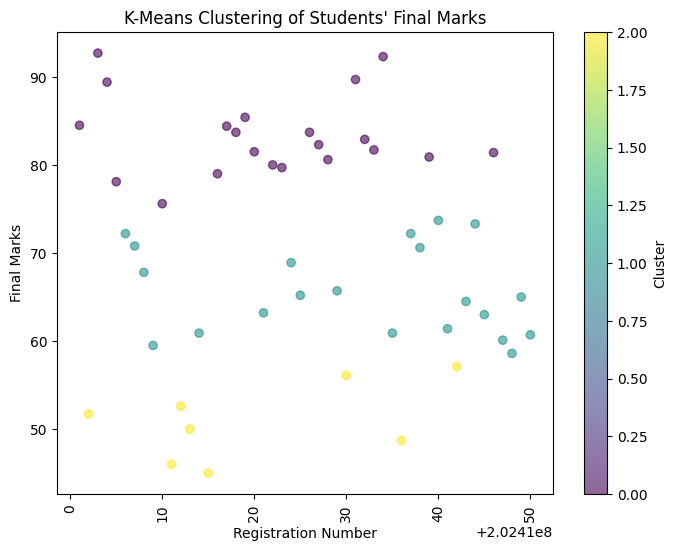

In [1]:
# Project :2
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# List of 50 unique first names for students
student_names = [
    "Alice", "Bob", "Charlie", "David", "Emma", "Frank", "Grace", "Henry", "Isla", "Jack",
    "Katherine", "Leo", "Mia", "Nathan", "Olivia", "Peter", "Quinn", "Ryan", "Sophia", "Thomas",
    "Ursula", "Victor", "Wendy", "Xander", "Yvonne", "Zach", "Abigail", "Benjamin", "Chloe", "Daniel",
    "Evelyn", "Felix", "Gabriella", "Harvey", "Ivy", "Jason", "Kylie", "Liam", "Madeline", "Noah",
    "Oscar", "Penelope", "Quincy", "Rebecca", "Samuel", "Trinity", "Ulysses", "Vanessa", "William", "Zoe"
]

# Generate 50 unique registration numbers
registration_numbers = [f"2024100{i:02d}" for i in range(1, 51)]

# Generate random marks (between 5 and 20) for TT-1 and TT-2
tt1_marks = np.random.randint(5, 21, 50)
tt2_marks = np.random.randint(5, 21, 50)

# Q1: Create term-test-1-result.csv
df_tt1 = pd.DataFrame({
    "Registration Number": registration_numbers,
    "Name": student_names,
    "TT-1 Marks": tt1_marks
})
df_tt1.to_csv("term-test-1-result.csv", index=False)

# Q2: Create term-test-2-result.csv with different TT-2 Marks
df_tt2 = pd.DataFrame({
    "Registration Number": registration_numbers,
    "Name": student_names,
    "TT-2 Marks": tt2_marks
})
df_tt2.to_csv("term-test-2-result.csv", index=False)


# Q3: Load both CSV files
df_tt1 = pd.read_csv("term-test-1-result.csv")
df_tt2 = pd.read_csv("term-test-2-result.csv")
# Merge data on 'Registration Number'
df_merged = pd.merge(df_tt1, df_tt2, on=["Registration Number", "Name"])
df_merged

# Q4: Create columns for best and average marks
df_merged["Best TT Marks"] = df_merged[["TT-1 Marks", "TT-2 Marks"]].max(axis=1)
df_merged["Average TT Marks"] = df_merged[["TT-1 Marks", "TT-2 Marks"]].mean(axis=1)
df_merged

# Q5: Drop 'TT-1 Marks' and 'TT-2 Marks'
df_merged.drop(columns=["TT-1 Marks", "TT-2 Marks"], inplace=True)
df_merged


# Q6: Create attendance and term final marks CSV
attendance_marks = np.random.randint(5, 11, 50)
term_final_marks = np.random.randint(40, 101, 50)

df_attendance = pd.DataFrame({
    "Registration Number": registration_numbers,
    "Attendance Marks": attendance_marks,
    "Term Final Marks": term_final_marks
})
df_attendance.to_csv("attendance-and-term-final.csv", index=False)

#  Load attendance and term final marks file
df_attendance = pd.read_csv("attendance-and-term-final.csv")

# Merge with term test dataframe
df_final = pd.merge(df_merged, df_attendance, on="Registration Number")

#  Create Final Marks column
df_final["Final Marks"] = df_final["Term Final Marks"] * 0.7 + df_final["Average TT Marks"] + df_final["Attendance Marks"]
df_final

# Q7: Save final result CSV
df_final.to_csv("final-result.csv", index=False)


# Q8: K-Means Clustering on Final Marks
X = df_final[["Final Marks"]]
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_final["Cluster"] = kmeans.fit_predict(X)

#  Visualization of Clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_final["Registration Number"], df_final["Final Marks"], c=df_final["Cluster"], cmap="viridis", alpha=0.6)
plt.xlabel("Registration Number")
plt.ylabel("Final Marks")
plt.title("K-Means Clustering of Students' Final Marks")
plt.colorbar(label="Cluster")
plt.xticks(rotation=90)
plt.show()